In [1]:
import cv2 
import numpy as np
import imutils
from scipy import ndimage

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

## https://www.geeksforgeeks.org/opencv-python-tutorial/#images

In [31]:
# some global params
blocksize = 5 # for adaptiveThreshold. based on image size and resolution. some sort of smoothing size. keep it odd. 
thresholding_binary_value = 3 # for cv2.adaptiveThreshold based on details in the original pic. 3 for high detail... otherwise increase it. keep it odd.
dilate_kernel_size = 3 # for cv2.dilate()

sub_image_size=256 # size of block to cut out to zoom in.

dpi=90

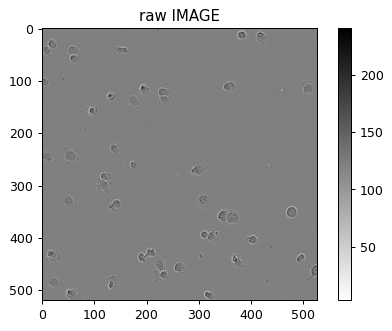

In [4]:
rootdir="/Users/hershalpandya/data/temp_delete/images/livecell_train_val_images/A172/"
img = cv2.imread(rootdir+'A172_Phase_A7_1_00d00h00m_1.tif')
img = img[:sub_image_size,:sub_image_size]

plt.figure(dpi=dpi)
plt.imshow(img,cmap='binary')
plt.title("raw IMAGE")
temp=plt.colorbar()

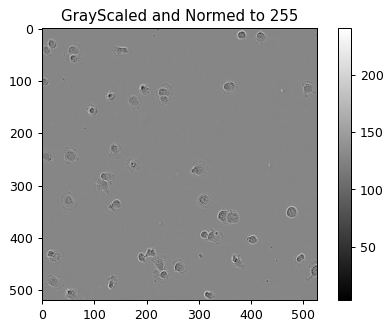

In [5]:
# when you do this, the range is automatically changed to 0 to 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(dpi=dpi)
plt.title("GrayScaled and Normed to 255")
plt.imshow(img,cmap='gray')
temp=plt.colorbar()

In [6]:
# adaptively calculates threshold across the image to return an array of same shapee as src image. 

thresh_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, thresholding_binary_value, blocksize)
  
# both perform almost same. We'll go with mean. 
thresh_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, thresholding_binary_value, blocksize)

Text(0.5, 1.0, 'Adaptive Gaussian')

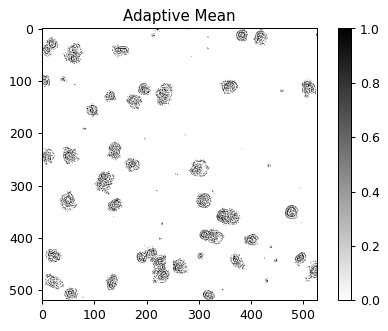

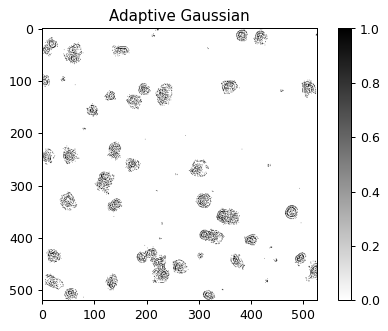

In [7]:
# the window showing output images
# with the corresponding thresholding 
# techniques applied to the input image
plt.figure(dpi=dpi)
plt.imshow(img>thresh_mean,cmap='binary')
plt.colorbar()
plt.title('Adaptive Mean')

plt.figure(dpi=dpi)
plt.imshow(img>thresh_gauss,cmap='binary')
plt.colorbar()
plt.title('Adaptive Gaussian')

In [8]:
mask=1.0*(img>thresh_gauss)
img = np.asarray(img, np.float64)
mask = np.asarray(mask, np.float64)
print (mask.shape,img.shape)

img_thresh=cv2.multiply(img,mask)
img_thresh/=np.max(img_thresh)

(520, 526) (520, 526)


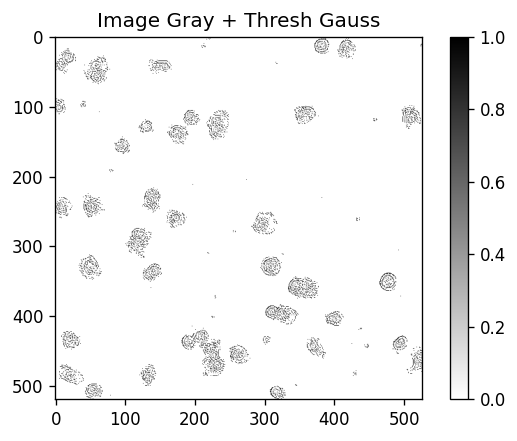

In [9]:
plt.figure(dpi = 120)
plt.title("Image Gray + Thresh Gauss")
plt.imshow(img_thresh,cmap='binary')
plt.colorbar()

In [10]:
# # img_thresh = cv2.GaussianBlur(img_thresh, (7, 7), 0)
# img_thresh = img_thresh

In [11]:
# plt.figure(dpi=dpi)
# plt.title("Image Gray + Thresh Gauss + Blur Gauss ")
# plt.imshow(img_thresh,cmap='binary')
# plt.colorbar()

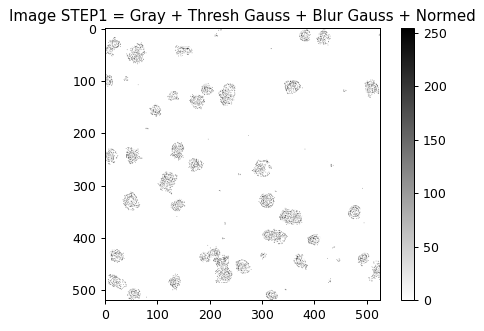

In [12]:
img_thresh=(img_thresh*1000).astype(np.uint8)

plt.figure(dpi=dpi)
plt.title("Image STEP1 = Gray + Thresh Gauss + Blur Gauss + Normed")
plt.imshow(img_thresh,cmap='binary')
plt.colorbar()

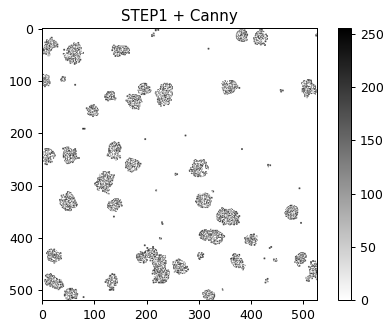

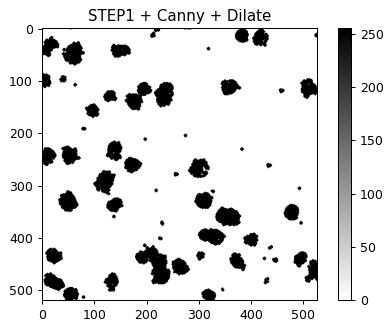

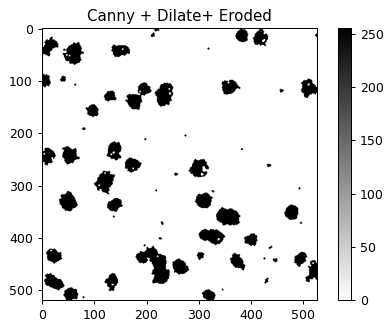

In [13]:
# The thresholder used in the Canny operator uses a method called "hysteresis". 
# Most thresholders used a single threshold limit, which means if the edge values fluctuate above and below this value 
# the line will appear broken (commonly referred to as ``streaking''). 
# Hysteresis counters streaking by setting an upper and lower edge value limit. 
# Considering a line segment, if a value lies above the upper threshold limit it is immediately accepted. 
# If the value lies below the low threshold it is immediately rejected. 
# Points which lie between the two limits are accepted if they are connected to pixels which exhibit strong response. 
# The likelihood of streaking is reduced drastically since the line segment points must fluctuate above the 
# upper limit and below the lower limit for streaking to occur. 
# Canny recommends the ratio of high to low limit be in the range two or three to one,
# based on predicted signal-to-noise ratios. 

img_thresh_edged = cv2.Canny(img_thresh, 30, 90)

plt.figure(dpi=dpi)
plt.imshow(img_thresh_edged,cmap='binary')
plt.title("STEP1 + Canny")
plt.colorbar()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(dilate_kernel_size,dilate_kernel_size))

img_thresh_edged_dilated = cv2.dilate(img_thresh_edged, kernel, iterations=2)

plt.figure(dpi=dpi)
plt.imshow(img_thresh_edged_dilated,cmap='binary')
plt.title("STEP1 + Canny + Dilate")
plt.colorbar()

img_thresh_edged_dilated_eroded = cv2.erode(img_thresh_edged_dilated, None, iterations=1)

plt.figure(dpi=dpi)
plt.imshow(img_thresh_edged_dilated_eroded,cmap='binary')
plt.title("Canny + Dilate+ Eroded")
plt.colorbar()


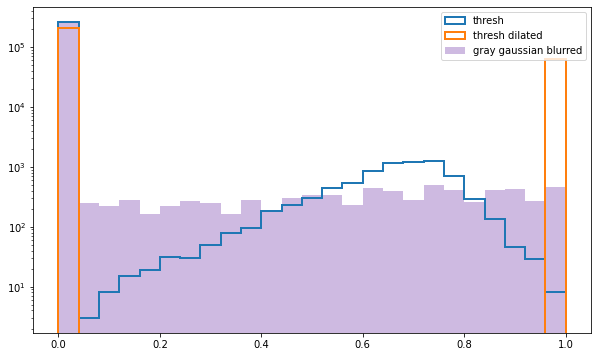

In [23]:
plt.figure(figsize=(10,6))
temp=plt.hist(img_thresh.ravel()/np.max(img_thresh),
              bins=25,log=True,alpha=1.0,label='thresh',histtype='step',lw=2.0,color='C0')
temp=plt.hist(img_thresh_dilated.ravel()/np.max(img_thresh_dilated),
              bins=25,log=True,alpha=1.0,
              label='thresh dilated',histtype='step',lw=2.0,color='C1')

# temp=plt.hist(img_thresh_edged_dilated.ravel(),bins=25,log=True,alpha=1.0,label='edged dilated',
#               histtype='step',lw=2.0,color='C2')
# temp=plt.hist(img_thresh_edged_dilated_eroded.ravel(),bins=25,log=True,alpha=1.0,label='edged dilated eroded',
#               histtype='step',lw=2.0,color='C3')
temp=plt.hist(img_thresh.ravel()/np.max(img_thresh),
              bins=25,log=True,alpha=0.45,label='gray gaussian blurred',color='C4')
plt.legend()

32
15.560382533916524 15.020424049225296 (32, 32)


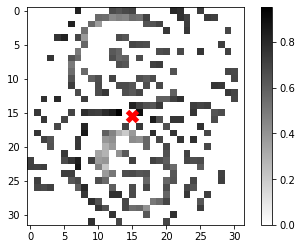

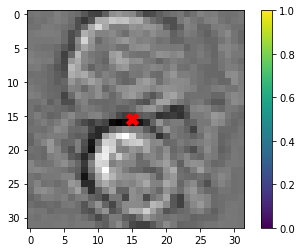

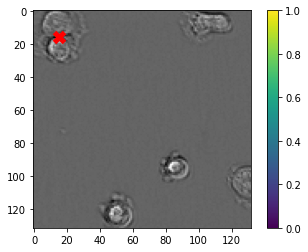

In [15]:
n=35#+80 # loc x / y
m=45#+70 # loc y / x
s=2**5 # size of block to cut
print (s)

img_for_segmenting = img
img_for_finding_centers = img_thresh#_blurred_edged_dilated


# mask = img_for_finding_centers==255
# mask = np.asarray(mask, np.float64)

# final_img = np.asarray(img_for_segmenting, np.float64)
# final_img=  cv2.multiply(final_img,new_mask)

plt.figure()
this_img = img_for_finding_centers[n:n+s,m:m+s]
cross_x, cross_y = ndimage.measurements.center_of_mass(this_img)
print (cross_x,cross_y, this_img.shape)


plt.imshow(this_img,cmap='binary')
plt.colorbar()
# y,x scatter because imshow flips axes
plt.scatter([cross_y],[cross_x],s=100,c='r',marker='x',lw=5)


plt.figure()
plt.imshow(img_for_segmenting[n:n+s,m:m+s],cmap='binary')
plt.scatter([cross_y],[cross_x],s=100,c='r',marker='x',lw=5)
plt.colorbar()

plt.figure()
plt.imshow(img_for_segmenting[n:n+s+100,m:m+s+100],cmap='binary')
plt.scatter([cross_y],[cross_x],s=100,c='r',marker='x',lw=5)
plt.colorbar()

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
(520, 526) (3, 3) (520, 526) 46


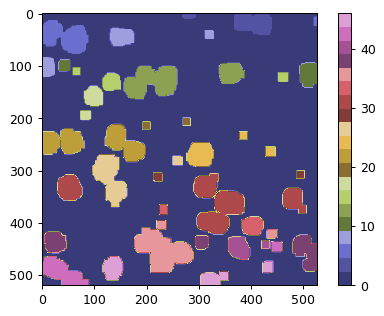

In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))

img_thresh_dilated = cv2.dilate(img_thresh, kernel, iterations=5)

img_to_label = img_thresh_dilated
img_to_label[img_to_label!=0]=1

connectivity = ndimage.generate_binary_structure(2,2)
labels, n_labels = ndimage.label(img_to_label, connectivity) 

print (connectivity)
print (img_for_finding_centers.shape, connectivity.shape, labels.shape, n_labels)

plt.figure(dpi=dpi)
plt.imshow(labels,cmap='tab20b')
plt.colorbar()

In [ ]:
cv2.MORPH_RECT